<a href="https://colab.research.google.com/github/urza3tar3/ai/blob/main/clusturing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)


# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "unsupervised_learning"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
from matplotlib.image import imread

In [3]:
image = imread(os.path.join("/content/satelite.png"))
image.shape


(606, 898, 3)

In [4]:
from sklearn.cluster import KMeans


In [5]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)



Saving figure blobs_plot


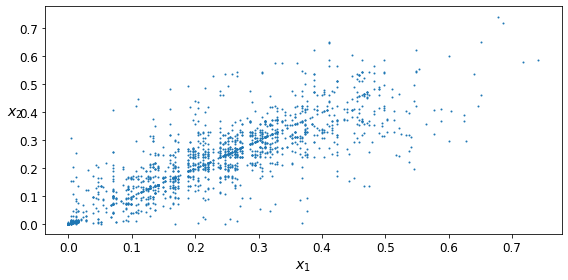

In [6]:
plt.figure(figsize=(8, 4))
plot_clusters(image)
save_fig("blobs_plot")
plt.show()

In [7]:
Z = image.reshape(-1, 3)
kmeans = KMeans(n_clusters=4 ,random_state=42).fit(Z)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)



Saving figure blobs_plot1


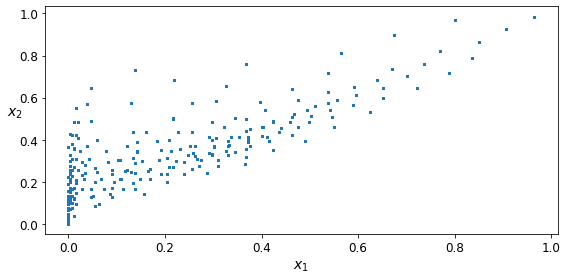

In [9]:
plt.figure(figsize=(8, 4))
plot_clusters(Z)
save_fig("blobs_plot1")
plt.show()

In [13]:
y_pred is kmeans.labels_

True

In [11]:
kmeans.cluster_centers_

array([[0.08337446, 0.2636398 , 0.25453728],
       [0.0083121 , 0.06403042, 0.11461205],
       [0.602386  , 0.6497884 , 0.63510966],
       [0.3394357 , 0.40620568, 0.37854224]], dtype=float32)

In [19]:
k = 4
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(Z)


In [23]:
 segmented_imgs = []
n_colors = (12,10, 8, 6, 4, 2)
for n_clusters in n_colors:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(Z)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


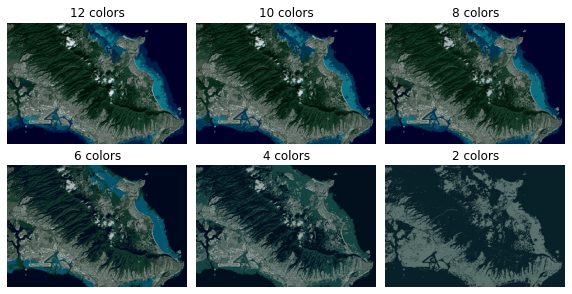

In [24]:
plt.figure(figsize=(10,5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(2,3,1)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')

for idx, n_clusters in enumerate(n_colors):
    plt.subplot(231 + idx)
    plt.imshow(segmented_imgs[idx])
    plt.title("{} colors".format(n_clusters))
    plt.axis('off')
